In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=1eb82a5ac61838046a8fb5e2fa9b66fccce3051d2d1e5b9739edf9a76d29e79d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [ ]:
import pyspark
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as F
from pyspark import SparkContext, SparkConf

In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

In [ ]:
# Load 3 datasets
data1 = spark.read.csv("Dataset/col_mat_nuw_output.csv", header=False, inferSchema=True)
data2 = spark.read.csv("Dataset/kan_output.csv", header=False, inferSchema=True)
data3 = spark.read.csv("Dataset/mon_kur_jaf_output.csv", header=False, inferSchema=True)

In [ ]:
data1.show(5)
data2.show(5)
data3.show(5)

+--------------------+--------------+----------+----------+
|                 _c0|           _c1|       _c2|       _c3|
+--------------------+--------------+----------+----------+
|1.969834395781014...|Colombo Proper|2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
+--------------------+--------------+----------+----------+
only showing top 5 rows

+--------------------+------------+----------+----------+
|                 _c0|         _c1|       _c2|       _c3|
+--------------------+------------+----------+----------+
|1.760713459877335...|Kandy Proper|2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|2019-01-02|2019-01-03|
|                NULL|Kandy Proper|2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|2019-01-04|2019-01-05|
|1.219517840206744...|Kandy P

In [9]:
# Add Column Names of data1
data1 = data1.toDF("_c1", "_c2", "_c3", "_c4").withColumnRenamed("_c1", "HCHO reading").withColumnRenamed("_c2", "Location").withColumnRenamed("_c3", "Current Date").withColumnRenamed("_c4", "Next Date")

# Show DataFrame with renamed columns
data1.show(5)

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
+--------------------+--------------+------------+----------+
only showing top 5 rows



In [10]:
# Add Column Names of data2
data2 = data2.toDF("_c1", "_c2", "_c3", "_c4").withColumnRenamed("_c1", "HCHO reading").withColumnRenamed("_c2", "Location").withColumnRenamed("_c3", "Current Date").withColumnRenamed("_c4", "Next Date")

# Show DataFrame with renamed columns
data2.show(5)

+--------------------+------------+------------+----------+
|        HCHO reading|    Location|Current Date| Next Date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                NULL|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
+--------------------+------------+------------+----------+
only showing top 5 rows



In [11]:
# Add Column Names of data3
data3 = data3.toDF("_c1", "_c2", "_c3", "_c4").withColumnRenamed("_c1", "HCHO reading").withColumnRenamed("_c2", "Location").withColumnRenamed("_c3", "Current Date").withColumnRenamed("_c4", "Next Date")

# Show DataFrame with renamed columns
data3.show(5)

+--------------------+------------------+------------+----------+
|        HCHO reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|                NULL|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
+--------------------+------------------+------------+----------+
only showing top 5 rows



In [13]:
# Get the number of rows
num_rows = data1.count()
print("Number of rows in data1:", num_rows)
num_rows = data2.count()
print("Number of rows in data2:", num_rows)
num_rows = data3.count()
print("Number of rows in data3:", num_rows)

Number of rows in data1: 5478
Number of rows in data2: 1826
Number of rows in data3: 5478


## Analyzing The Dataset

In [14]:
# Union the three DataFrames to combine them
full_data = data1.union(data2).union(data3)

num_rows = full_data.count()
print("Number of rows in full dataset:", num_rows)

Number of rows in full dataset: 12782


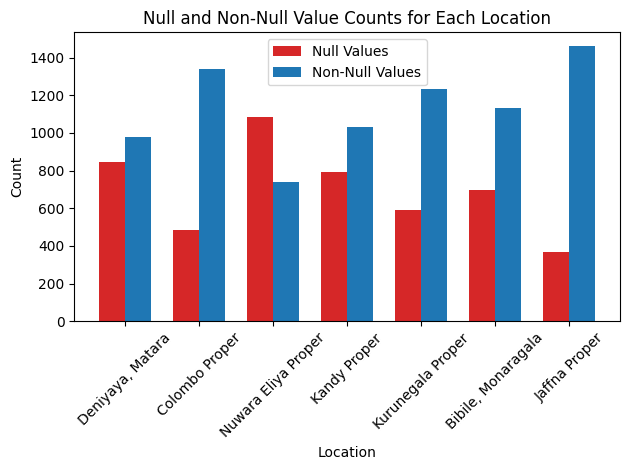

In [28]:
# Calculate counts of null and non-null values for each location
null_counts = full_data.groupBy("Location").agg(F.sum(F.when(F.col("HCHO reading").isNull(), 1).otherwise(0)).alias("null_count"))
non_null_counts = full_data.groupBy("Location").agg(F.sum(F.when(F.col("HCHO reading").isNotNull(), 1).otherwise(0)).alias("non_null_count"))

# Extracting data for plotting
locations = [row["Location"] for row in null_counts.collect()]
null_values = [row["null_count"] for row in null_counts.collect()]
non_null_values = [row["non_null_count"] for row in non_null_counts.collect()]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
x = range(len(locations))

bar1 = ax.bar(x, null_values, width=bar_width, color='C3', label='Null Values')
bar2 = ax.bar([i + bar_width for i in x], non_null_values, width=bar_width, color='C0', label='Non-Null Values')

ax.set_ylabel('Count')
ax.set_xlabel('Location')
ax.set_title('Null and Non-Null Value Counts for Each Location')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(locations, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()